In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTENC,SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, ShuffleSplit, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier


# Bussiness Understanding
**Context**

Perkembangan teknologi telah mentransformasi industri telekomunikasi didunia. Pergeseran telekomunikasi *legacy* (voice dan sms) menjadi teknologi berbasis data didukung oleh perkembangan internet yang begitu masif dan bersifat global. Banyak perusahaan telekomunikasi membuat pelanggan yang telah berlangganan melakukan *Churn*. *Churn* adalah pemutusan layanan jasa telekomunikasi oleh pelanggan atau perusahaan. Perusahaan akan lebih mempertahankan pelanggan, sebab dibutuhkan biaya yang lebih sedikit dibandingkan dengan mencari pelanggan baru.

Suatu perusahaan provider ingin mengetahui behavior pelanggan yang ingin melakukan pemberhentian/pindah (churn) dan mengurangi jumlah pelanggan yang *churn*. Dilakukan sebuah model prediksi yang tepat untuk menentukan pelanggan yang berhenti berlangganan (churn) atau tidak menggunakan machine learning. Dengan target yang ditentukan sebagai berikut :

Target: 
* 0 : Tidak berhenti berlangganan 
* 1 : Berhenti berlangganan (Churn)


# Problem Statement

Pada suatu perusahaan tingginya pelanggan yang melakukan *Churn* merupakan suatu indikator tingkat kegagalan suatu perusahaan telekomunikasi. Sehingga diperlukan upaya untuk mengurangi persentase pelanggan yang melakukan *Churn*. Seperti disebutkan sebelumnya bahwa untuk mencari pelanggan lebih dibutuhkan biaya yang lebih besar dibandingkan mempertahankan pelanggan dimana dibutuhkan **5 kali lebih besar** biaya dibandingkan mempertahankan pelanggan( [sumber](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/).). Menurut [sumber](https://www.woopra.com/blog/churn-rate-vs-retention-rate#:~:text=Customer%20churn%20rate%20is%20the,up%20and%20stay%20with%20you.) )apabila kita melakukan suatu *ads* untuk menarik pelanggan baru dgn biaya sebesar 100 dolar perbulan untuk mendapatkan pelanggan baru dan biaya perpelanggan perbulan sebesar 50 dolar, maka setidaknya setiap bulan harus ada 2 pelanggan untuk menutup biaya pelanggan baru tersebut. Salah satu cara perusahaan telekomunikasi mempertahankan pelanggannya agar tidak melakukan Churn yaitu memberikan insentif retensi terhadap pelanggan. Insentif retensi terdiri dari berbagai macam seperti memberikan potongan harga, memberikan paket layanan yang menarik, memberikan prioritas pelayanan dan lain-lain. Namun, kebijakan pemberian insentif retensi belum dilakukan secara efektif. Kebijakan tersebut sering ditemui berbagai kendala bahkan membuat
perusahaan semakin merugi. 

## Goals

Sehingga dari permasalahan yang ada, perusahaan ingin memiliki kemampuan untuk dilakukannya prediksi kemungkinan seorang pelanggan akan berhenti berlangganan atau tidak. Untuk memfokuskan upaya retensi(tetap berelanggan) pada pelanggan yang terindikasi akan melakukan *Churn*. Selain itu juga agar perusahaan mengetahui faktor yang memengaruhi pelanggan bertahan agar strategi bisnis yang dilakukan tepat dengan keinginan pelanggan untuk menurunkan tingkat dari pelanggan yang *Churn*.

## Analytics Approach

Akan dilakukan analisa bagaimana faktor pembeda dari pelanggan yang melakukan *Churn* dan tidak. selanjutnya akan dibuat model klasifikasi untuk memprediksi probabilitas dari pelanggan akan melakukan *Churn* atau tidak.

# Metric Evaluation

Target utama dalam masalah ini adalah pelanggan yang berhenti berlangganan (Churn), seperti target yang sudah disebutkan pada context sebelumnya yaitu:

Target:
* 0 : Tidak berhenti berlangganan 
* 1 : Berhenti berlangganan (Churn)

False Positive (FP) yaitu pelanggan yang aktualnya tidak tetapi diprediksi churn.
konsekuensi : tidak efektif dalam pemberian insentif. <br>
False negative(FN) yaitu pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn. konsekuensi kehilangan pelanggan.

Berdasarkan konsekuensi yang ada, akan dibuat model yang akan mengurangi resiko kehilangan pelanggan karena untuk mendapatkan pelanggan baru membutuhkan biaya lebih banyak dibandingkan kita mempertahankan pelanggan yang ada. Sehingga kita akan fokus pada nilai FN dengan mendapatkan nilai **recall** yang tinggi dan tetap membandingkan nilai **precision** agar tidak terlalu jauh. Kita ingin recall dan precisionya seimbang sehingga digunakan metric **f1_score** dengan data yang *imbalance*. Dilakukan juga Sampling *Undersampling (NearMiss)* dan *Oversampling(SMOTE)*. Selanjutnya akan dibandingkan model mana yang paling cocok untuk digunakan pada kasus ini.

* Sumber data : https://drive.google.com/file/d/1oB5uKtJr7dWcWr9Ld5ZFAuVkpV005ceH/view
* Pembuat data : IBM
* Periode pembuatan data : Juli 2019

In [2]:
df=pd.read_csv('data_telco_customer_churn.csv')

In [3]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


# Informasi Data

Terdapat 4930 baris dan 11 kolom yang memberikan informasi mengenai informasi pelanggan yang menggunakan jasa telekomunikasi ini.

## Kolom Prediksi 
1. **Churn** : Berisi data pelanggan churn atau tidak (Yes/No)

## Kolom Numerikal 
2. **Tenure** : Berisi informasi jumlah durasi lamanya pelanggan sudah berlangganan pada perusahaan.
3. **MonthlyCharges** : Berisi informasi jumlah tagihan pelanggan setiap bulan.

## Kolom Kategorikal
4. **Dependents** : Berisi informasi apakah pelanggan memiliki tanggungan atau tidak (Yes/No)

5. **OnlineSecurity** : Berisi informasi pelanggan memiliki online security atau tidak (Yes/No/No Internet Service)

6. **OnlineBakcup** :  Berisi informasi pelanggan memiliki online backup atau tidak (Yes/No/No Internet Service)

7. **InternetService** :  Berisi informasi jenis internet provider pelanggan(DSL,Fiber optic, No)

8. **DeviceProtection**: Berisi informasi pelanggan memiliki perlindungan device atau tidak (Yes/No/No Internet Service)

9. **TechSupport** :  Berisi informasi pelanggan memiliki tech support atau tidak (Yes/No/No Internet Service)

10. **Contract** :  Berisi informasi kontrak pelanggan (Month-to-month/One year/Two years)

11. **PaperlessBilling** :  Berisi informasi pelanggan menggunakan tagihan online atau tidak (Yes,No)

# Data Wrangling

In [4]:
df_churn=df.copy()

In [5]:
def unik (x):
    Type=[]
    Count=[]
    Sample=[]
    MissVal=[]
    for i in x.columns:
        Sample.append(x[i].unique()[:5])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    unik=pd.DataFrame({
        'Columns':df.columns,
        'Dtype':Type,
        'Nunique':Count,
        'Missing Value':MissVal,
        'Unique':Sample
    })
    return unik

In [6]:
unik(df_churn)

,Columns,Dtype,Nunique,Missing Value,Unique
0,Dependents,object,2,0,"[Yes, No]"
1,tenure,int64,73,0,"[9, 14, 64, 72, 3]"
2,OnlineSecurity,object,3,0,"[No, Yes, No internet service]"
3,OnlineBackup,object,3,0,"[No, Yes, No internet service]"
4,InternetService,object,3,0,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,3,0,"[Yes, No internet service, No]"
6,TechSupport,object,3,0,"[Yes, No, No internet service]"
7,Contract,object,3,0,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,2,0,"[Yes, No]"
9,MonthlyCharges,float64,1422,0,"[72.9, 82.65, 47.85, 69.65, 23.6]"


Pada tabel dapat kita lihat bahwa data tidak memiliki *missing value*. pada tiap kolom juga memiliki nilai lebih dari satu sehingga kita dapat melakukan klasifikasi.

Kita lihat juga bahwa pada feature Onlinesecurity, OnlineBackup, DeviceProtection dan TechSupport, maka akan kita dapat nilai unik 'Yes', 'No' dan 'No internet service'. secara pengertiannya data dengan nilai 'No internet service' pada data tersebut memiliki pengertian 'No' karena pelanggan tersebut memang tidak menggunakan InternetService, maka pelanggan tersebut juga tidak menggunakan pelayanan yang sudah disebutkan sebelumnya. dapat dilihat pada tabel dibawah ini bahwa tidak ada nilai 'Yes'.

In [78]:
df_no_internet = df[df['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,1,[No internet service]
1,OnlineBackup,1,[No internet service]
2,InternetService,1,[No]
3,DeviceProtection,1,[No internet service]
4,TechSupport,1,[No internet service]


In [7]:
df_churn = df_churn.replace('No internet service','No')
df_churn
unik(df_churn)

,Columns,Dtype,Nunique,Missing Value,Unique
0,Dependents,object,2,0,"[Yes, No]"
1,tenure,int64,73,0,"[9, 14, 64, 72, 3]"
2,OnlineSecurity,object,2,0,"[No, Yes]"
3,OnlineBackup,object,2,0,"[No, Yes]"
4,InternetService,object,3,0,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,2,0,"[Yes, No]"
6,TechSupport,object,2,0,"[Yes, No]"
7,Contract,object,3,0,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,2,0,"[Yes, No]"
9,MonthlyCharges,float64,1422,0,"[72.9, 82.65, 47.85, 69.65, 23.6]"


kita lihat juga bahwa pada beberapa kolom terdapat kolom yang memiliki makna yang sama yaitu 'No' dan 'No internet service'. kemudian data ini diubah menjadi 'No'.

### Missing value checking

In [8]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [9]:
df.isnull().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [10]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Pada data ini tidak memiliki missing value

# Outlier Checking

<AxesSubplot:xlabel='tenure'>

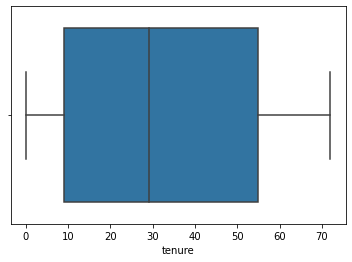

In [11]:
sns.boxplot(x=df_churn['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

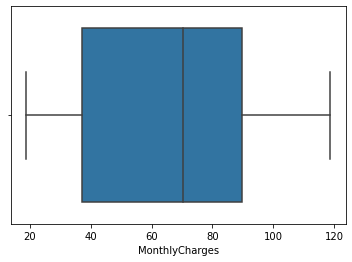

In [12]:
sns.boxplot(x=df_churn['MonthlyCharges'])



Dapat dilihat pada box plot tenure dan MonthlyCharges bahwa data ini tidak memiliki *Outliers*

### Exploratory Data Analysis

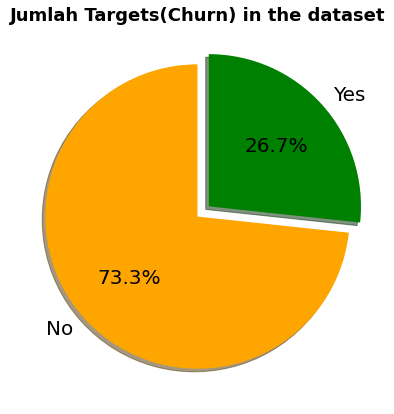

In [76]:
plt.figure(figsize=(7,7))
plt.title("Jumlah Targets(Churn) in the dataset", size=18, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), labels=['No', 'Yes'], colors=["orange","green"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

In [14]:
df['Churn'].value_counts()

No     3614
Yes    1316
Name: Churn, dtype: int64

In [15]:
df_churn['Churn'].value_counts()/len(df)

No     0.733063
Yes    0.266937
Name: Churn, dtype: float64

Dapat dilihat pada plot diatas bahwa orang yang churn dan tidak yaitu sebesar :
    * Churn : No --> 73.3%
    * Churn : Yes --> 26.7%
Data yang dimiliki tidak seimbang **Imbalance** sehingga nanti perlu dilakukan *sampling*

In [16]:
cat_features = [feature for feature in df.columns if df_churn[feature].dtypes == 'O']
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

## Categorical Features

In [17]:
listItem = []

for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     len(df),
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col])) * 100,2),
                     df[col].nunique(), 
                     df[col].unique()])

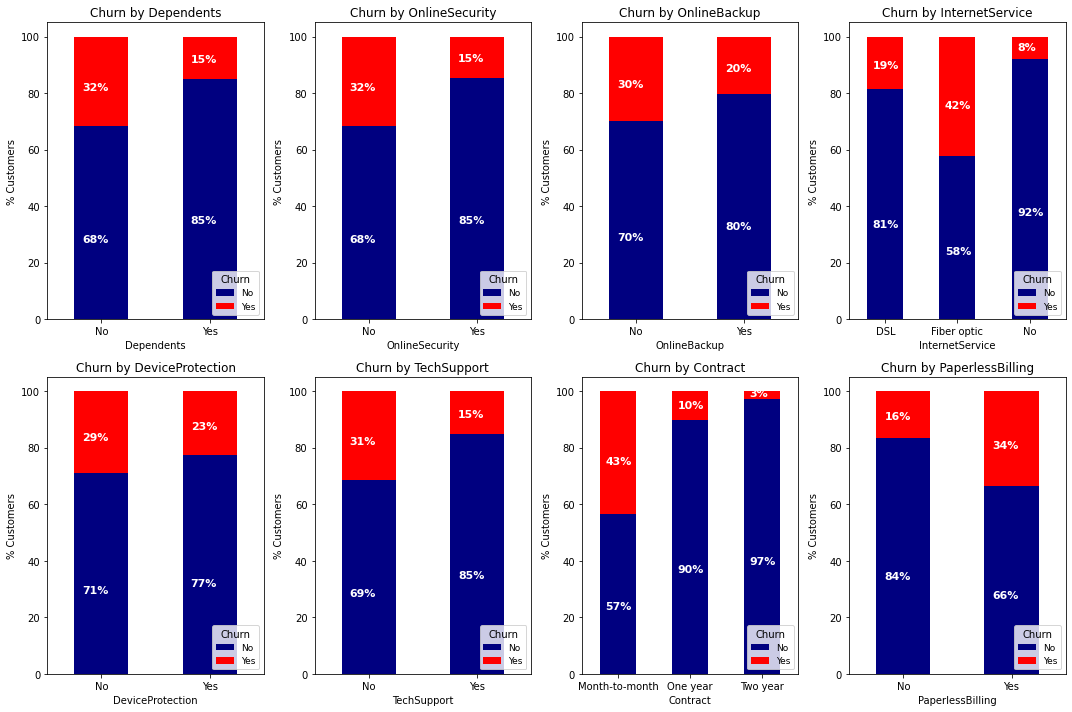

In [18]:
plt.figure(figsize=(15, 10), facecolor='white')
plotnumber = 1

for feature in cat_features[:-1]:

        column1 = feature

        # membuat table berdasarkan 2 kolom kategorikal
        groupby_table = df_churn.groupby([column1,'Churn']).size().unstack()

        # fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot (letak grafik)
        ax = plt.subplot(2, 4, plotnumber)
        
        # Harga rumah berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,
                                                                color = ['navy', 'red'])

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # menambahkan label data pada stacked bar chart
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
                
        plt.tight_layout();
        
        plotnumber += 1
        

Berdasarkan Barplot diatas dapat disimpulkan bahwa:
1. Pelanggan yang tidak memiliki tanggungan (**Dependent**) cenderung melakukan **Churn** dibandingkan pelanggan yang memiliki tanggungan.
2. Pelanggan yang tidak menggunakan **OnlineSecurity** cenderung Churn dibandingkan dengan yang menggunakan.
3. Plenaggan yang tidak menggunakan **OnlineBackup** cenderung Churn dibandingkan dengan yang menggunakan.
4. Pelanggan yang menggunakan **InternetService** 'Fiber Optic' cenderung melakukan churn dibandingkan dengan pelanggan yang menggunakan internet service 'DSL' dan diikuti dengan 'No'
5. Pelanggan yang tidak menggunakan **DeviceProtection** cendurung Churn dibandingkan yang menggunakan.
6. Pelanggan yang tidak menggunakan **Tech Support** cenderung Churn dibandingkan yang menggunakan.
7. Pelanggan yang **Contract** nya Perbulan cenderung melakukan Churn, berurutan diikuti oleh pelanggan yang kontraknya setahun dan dua tahun.
8. Pelanggan yang menggunakan **PaperlessBilling** cenderung Churn dibandingkan dengan pelanggan yang tidak menggunakan.


### Numerikal features

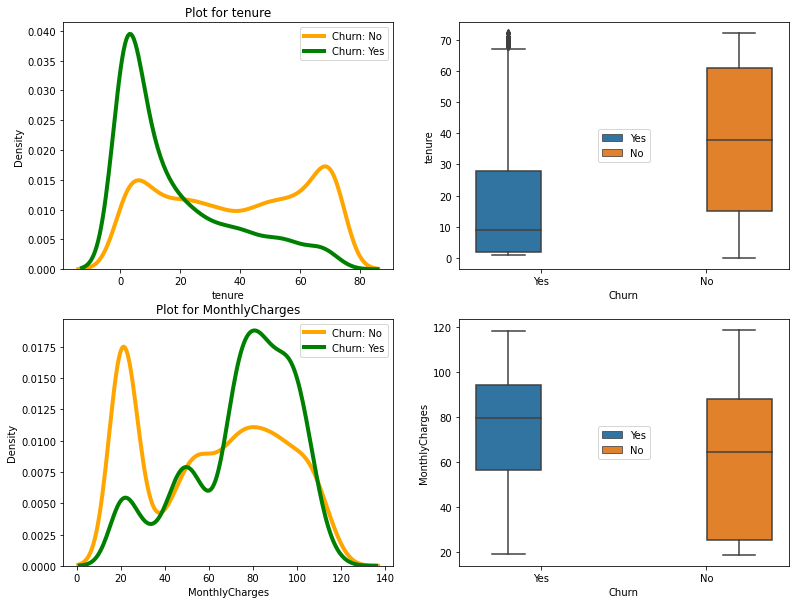

In [19]:
plt.figure(figsize=(13, 10))
def plotting(target, feature, hist, kde, subplot):
    plt.subplot(subplot)
    plt.title("Plot for {}".format(feature))
    sns.distplot(df[df[target] == 'No'][feature], hist=hist, kde=kde, 
                 color = 'orange',  
                 label= target + ': No',
                 kde_kws={'linewidth': 4})
    sns.distplot(df[df[target] == 'Yes'][feature], hist=hist, kde=kde, 
                 color = 'green',  
                 label= target + ': Yes',
                 kde_kws={'linewidth': 4})
    plt.legend()
    plt.subplot(subplot+1)
    sns.boxplot(data = df,y = feature, x = target, hue = target)
    plt.legend(loc='center')

plotting(target = 'Churn', feature = 'tenure', hist = False, kde = True, subplot = 221)

plotting(target = 'Churn', feature = 'MonthlyCharges', hist = False, kde = True, subplot = 223)

plt.show()

Pada Plot diatas dapat disimpulkan bahwa :
1. Pelanggan yang memiliki **tenure** rendah cenderung melakukan Churn
2. Pelanggan yang biaya **MonthlyCharges** (biaya tagihan per bulan) tinggi cenderung untuk melakukan Churn.

# Data Preprocessing
feature:<br>
X='Dependents,OnlineSecurity,'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',Tenure,Monthly charge
<br>
Y= Churn


In [20]:
df_churn['Churn'] = df_churn['Churn'].map({'Yes' : 1, 'No' : 0})
df_churn.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No,No,No,No,No,Month-to-month,Yes,23.60,0


Dilakukan perubahan nilai pada kolom  *feature* **Churn** dari 'Yes' menjadi nilai 1 dan untuk nilai 'No' menjadi 0 seperti terlihat pada tabel diatas.

In [21]:
x=df_churn.drop(columns='Churn')
y=df_churn['Churn']

feature:<br>
x='Dependents,OnlineSecurity,'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',Tenure,Monthly charge
<br>
y= Churn


## Scaling

Pada permodelan machine learning akan dicoba menggunakan algoritma *Logistic Regression* dan *KNN* maka akan dilakukan scalling pada data kita. permodelan diharapkan memiliki skala yang sama sehingga akan maksimal dalam target. jika tidak dilakukan scaling maka variabel dengan skala besar akan mendominasi yang kecil. Pada data numerikal juga tidak memiliki outlier (**Tenure dan MonthlyCharges**) sehingga dapat digunakan MinMaxScaler().

In [22]:
scaler = MinMaxScaler()

## Sampling

Karena Data yang kita miliki tidak seimbang untuk mengatasinya sehingga kita akan menggunakan metode resampling agar data memiliki distribusi kelas yang lebih seimbang.

Akan dilakukan Ujicoba Oversampling dan UnderSampling dan akan dilihat parameter mana yang lebih maksimal dalam permodelan kita. Dimana pada oversampling kita akan menggunakan : <br>
SMOTE()

Dan pada data Undersampling :<br>
Nearmiss()


In [79]:
#Digunakan untuk oversampling
resample = SMOTE() 

#Digunakan untuk undersampling
rus=NearMiss()


## Data Splitting

pada permodelan digunakan train size = 0.7 sehingga data training kita adalah sebesar 70% dari dataset. kemudian karena menggunakan klasifikasi untuk memprediksi data yang sifatnya kategorik, kita menggunakan stratify =y agar proporsi y_train dan y_test sama.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size =0.7, random_state=42)


## Data Transformer (Encoding)

1. Merubah feature **Dependent,OnlineSecurity,'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling'** karena fitur ini jumlah unique nya hanya sedikit dan tidak memiliki kelas/urutan(ordinal) sehingga kita encode menggunakan **One Hot Encoding**.

2. Merubah feature **Contract** menggunakan **Ordinal Encoder** karena datanya memiliki kelas yaitu Month-to-month menjadi kelas 3, One Year menjadi kelas 2, two year menjadi kelas 1.


In [25]:
ordinal=[{'col' : 'Contract', 
            'mapping' :{'Month-to-month' : 3, 
                        'One year' : 2,
                        'Two year' : 1}
           }]

In [26]:
transformer=ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['Dependents','OnlineSecurity','OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal',ce.OrdinalEncoder(mapping=ordinal),['Contract'])
],remainder='passthrough')

## Modelling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
# Model
logreg=LogisticRegression(random_state=42)
knn=KNeighborsClassifier(n_neighbors=62)
tree=DecisionTreeClassifier(random_state=42,max_depth=3)
rf = RandomForestClassifier(random_state=42,max_depth=3)
ada=AdaBoostClassifier(tree,learning_rate=0.1,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=42,max_depth=3)
xgb = XGBClassifier(learning_rate=0.1,random_state=42,max_depth=3)


In [29]:
skfold= StratifiedKFold(n_splits = 5)

In [30]:
models = [logreg, knn, tree, rf, ada, gbc, xgb]

mean_with_sampling = []
std_with_sampling = []
mean_without_sampling = []
std_without_sampling = []

mean_with_undersampling=[]
std_with_undersampling=[]

for model in  models :

    # modeling with oversampling
    pipe_model_with_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('model', model)
    ])

    model_cv_with_sampling = cross_val_score(
        estimator = pipe_model_with_sampling,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        n_jobs = -1
    )
    mean_with_sampling.append(model_cv_with_sampling.mean())
    std_with_sampling.append(model_cv_with_sampling.std())

        # modeling without oversampling

    pipe_model_without_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('model', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        n_jobs = -1
    )
    
    mean_without_sampling.append(model_cv_without_sampling.mean())
    std_without_sampling.append(model_cv_without_sampling.std())
    
    # modeling with undersampling
    pipe_model_with_undersampling = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', rus),
        ('model', model)
    ])

    model_cv_with_undersampling = cross_val_score(
        estimator = pipe_model_with_undersampling,
        X = x_train,
        y = y_train,
        cv = skfold,
        scoring = 'f1',
        n_jobs = -1
    )
    mean_with_undersampling.append(model_cv_with_undersampling.mean())
    std_with_undersampling.append(model_cv_with_undersampling.std())
    


In [31]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost'],
    'mean_f1_with_SMOTE' : mean_with_sampling,
    'mean_f1_without_sampling' : mean_without_sampling,
    'mean_f1_with_NearMiss:' : mean_with_undersampling,
    'std_f1_with_SMOTE' : std_with_sampling,
    'std_f1_without_sampling' : std_without_sampling,
    'std_f1_with_NearMiss': std_with_undersampling,
    

}).sort_values('mean_f1_with_SMOTE', ascending=False)

,model,mean_f1_with_SMOTE,mean_f1_without_sampling,mean_f1_with_NearMiss:,std_f1_with_SMOTE,std_f1_without_sampling,std_f1_with_NearMiss
4,AdaBoost,0.633858,0.562183,0.427797,0.018809,0.014880,0.021251
2,Decision Tree,0.624919,0.491504,0.482766,0.018636,0.041827,0.030625
5,GradienBoost,0.624570,0.554598,0.432120,0.017364,0.025460,0.029475
6,XGBoost,0.619211,0.576220,0.433061,0.019087,0.028195,0.018295
0,Logistic Regression,0.619108,0.577265,0.522021,0.014864,0.032828,0.016474
3,Random Forest,0.612765,0.474495,0.483862,0.003986,0.047284,0.009613
1,KNN,0.592290,0.567144,0.475206,0.015114,0.028458,0.021061


Pada hasil modelling nilai rata-rata dari validasi set nilainya lebih baik menggunakan sampling menggunakan SMOTE dibandingkan tanpa sampling dan menggunakan undersampling NearMiss. Sehingga selanjutnya permodelan akan menggunakan sampling dengan menggunakan metode Oversampling SMOTE, karena terbukti dapat meningkatkan performa dari algoritma klasifikasi.

Dapat dilihat bahwa pada hasil modelling *AdaBoost* memiliki nilai yang yang paling tinggi untuk f1 skor nya yaitu sebesar 0.63 dengan standar deviasi yang cukup stabil. namun, nilai f1 skornya nya cenderung tidak jauh berbeda dengan model-model yang lain sehingga semua model akan di train dan ditest ke data set. Selanjutnya akan dilihat tiga model terbaik untuk dilakukan tuning.

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
models = [logreg, knn, tree, rf, ada, gbc, xgb]
score_f1_test = []
score_f1_train = []

def y_pred_function(model):
    estimator = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('model', model)
    ])
    
    estimator.fit(x_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_function(model)
    y_pred_test = estimator.predict(x_test)
    y_pred_train = estimator.predict(x_train)
    score_f1_test.append(f1_score(y_test,y_pred_test))
    score_f1_train.append(f1_score(y_train,y_pred_train))
    



In [34]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'XGBoost'],
             'f1 score (train set)': score_f1_train,
             'f1 score (validation set)':mean_with_sampling,
             'f1 score (test set)': score_f1_test}).set_index('model').sort_values(by='f1 score (test set)',ascending=False)

,f1 score (train set),f1 score (validation set),f1 score (test set)
model,,,
XGBoost,0.668793,0.619211,0.645094
AdaBoost,0.661111,0.633858,0.643533
GradienBoost,0.663582,0.624570,0.643386
Logistic Regression,0.627332,0.619108,0.638000
Decision Tree,0.626632,0.624919,0.629555
Random Forest,0.619707,0.612765,0.629384
KNN,0.612763,0.592290,0.610909


Berdasarkan hasil train dan test pada data. pada kasus ini didapat hasil paling bagus pada model **XGBoost** sebesar 66% diikuti model model **Gradient Boost**, **Ada Boost**  yang nilainya cukup mirip sehingga pada ketiga model ini dilakukan tuning untuk melihat bagaimana performa dari ketiga model tersebut untuk mencari model yang memiliki perfoma paling maksimal.

# Tuning

In [35]:
# Model
xgb = XGBClassifier(learning_rate=0.1,random_state=42,max_depth=3)
ada=AdaBoostClassifier(tree,learning_rate=0.1,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=42,max_depth=3)


In [37]:
# Estimator
tunning_models=[xgb,ada,gbc]
for model in tunning_models: 
    estimator=Pipeline([
        ('processing',transformer),('scalar',scaler),('sampling',resample),
        ('model',model)
    ])

In [38]:
hyperparam=[
    {'model':[xgb],
    'model__learning_rate':[0.25],
    'model__n_estimators':[50],
    'model__max_depth':[3,4,5]},
    {'model':[xgb],
    'model__learning_rate':[0.5],
    'model__n_estimators':[100],
    'model__max_depth':[3,4,5]},
    {'model':[xgb],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[3,4,5]},
     {'model':[ada],
    'model__learning_rate':[0.25],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[50]},
    {'model':[ada],
    'model__learning_rate':[0.5],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[100]},
    {'model':[ada],
    'model__learning_rate':[0.1],
    'model__base_estimator__criterion':['gini','entropy'],
    'model__base_estimator__max_depth':[1,2,3,4,5],
    'model__n_estimators':[200]},
    {'model':[gbc],
    'model__learning_rate':[0.25],
    'model__n_estimators':[50],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.5],
    'model__n_estimators':[100],
    'model__max_depth':[1,2,3,4,5]},
    {'model':[gbc],
    'model__learning_rate':[0.1],
    'model__n_estimators':[200],
    'model__max_depth':[1,2,3,4,5]},
]

In [39]:
# Grid Search
skfold=StratifiedKFold(n_splits=5)
grid=GridSearchCV(estimator,
                 param_grid=hyperparam,
                 cv=skfold,
                 scoring='f1',
                 n_jobs=-1)

In [40]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEn...
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [50]},
                         {'model': [GradientBoostingClassifier(random_state=42)],
                          'model__learning_rate': [0.5],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [100]},
                         {'model': [GradientBoostingClassifier(random_state=42)],
                          'model__learning_rate': [0.1],
                          'model__max_depth': [1, 2, 3, 4, 5],
                          'model__n_estimators': [200]}],
             scoring='f1')

In [72]:
grid.best_params_, grid.best_score_

({'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.25, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=50, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=42, ...),
  'model__learning_rate': 0.25,
  'model__max_depth': 3,
  'model__n_estimators': 50},
 0.6287165258981868)

Dari hasil tuning didapatkan bahwa model terbaik itu didapatkan bahwa model **XGBoost** memiliki performa paling baik diantara yang lain dengan menggunakan parameter learning rate :0.25, max_depth 3, dan n_estimator: 50.

In [64]:
# Before Tuning
xgb = XGBClassifier(learning_rate=0.1,random_state=42,max_depth=3)
estimator=Pipeline([
    ('processing',transformer),
    ('scaler',scaler),
    ('sampling',resample),
    ('model',xgb)
])
estimator.fit(x_train,y_train)
y_pred_before=estimator.predict(x_test)
print(classification_report(y_test,y_pred_before))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1084
           1       0.54      0.79      0.64       395

    accuracy                           0.77      1479
   macro avg       0.73      0.77      0.74      1479
weighted avg       0.81      0.77      0.78      1479



In [68]:
# After Tuning
best_model=grid.best_estimator_
best_model.fit(x_train,y_train)
y_pred_after=best_model.predict(x_test)
print(classification_report(y_test,y_pred_after))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1084
           1       0.55      0.78      0.65       395

    accuracy                           0.77      1479
   macro avg       0.73      0.78      0.74      1479
weighted avg       0.81      0.77      0.78      1479



Hasil tersebut menunjukan bahwa setelah dilakukan tuning nilai **f1-score** model lebih baik dari model sebelum dilakukan tuning atau meningkat sebesar 1%. 

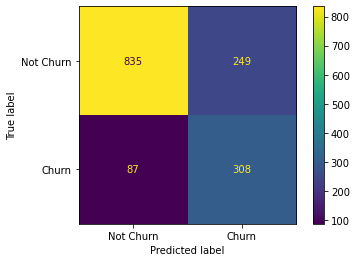

In [56]:
plot_confusion_matrix(best_model, x_test, y_test, display_labels=['Not Churn', 'Churn'])

setelah tuning model XGBoost hasil dari modelnya yaitu sebesar 55% precision dan 78% recall hal ini sejalan dengan metrik evaluasi diawal bahwa kita menginginkan recall yang tinggi dan tetap mempertahankan nilai precision.

In [57]:
features=list(best_model[0].transformers_[0][1].get_feature_names_out())+(best_model[0].transformers_[1][1].get_feature_names())+list(x.columns[best_model[0].transformers_[2][2]])

In [106]:
best_model[0].transformers_[2]

('remainder', 'passthrough', [1, 9])

In [96]:
best_model

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Contract',
                                                                           'mapping': {'Month-to-month': 3,
                                                                                       'One year': 2,
                                                                                       'Two year': 1}}...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.25,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, ...))])

In [81]:
pd.DataFrame({'important':best_model[3].feature_importances_},index=features).sort_values('important',ascending=False).head(3)

,important
Contract,0.326560
InternetService_Fiber optic,0.232101
InternetService_No,0.193637


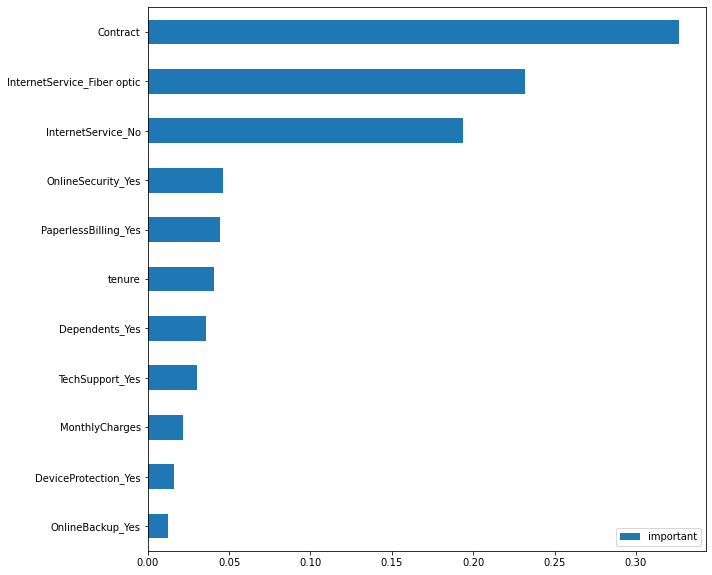

In [92]:
# Visualizatin
pd.DataFrame({'important':best_model[3].feature_importances_},index=features).sort_values('important',ascending=True).plot(kind='barh',figsize=(10,10))
plt.show()

Terlihat bahwa pada model XBoost kita bahwa feature paling penting adalah feature Contract, Internet Service dan Internet Fiber Optic. dan yang lainnya cenderung tidak begitu penting.

# Model & Cost Evaluation

Evaluasi terhadap biaya yang akan dikeluarkan jika kita menggunakan model **XGBoost** yang sudah kita buat seperti yang sudah di sebutkan pada bagian **Problem Statement** bahwa untuk mendapatkan pelanggan baru memerlukan biaya **5 kali lebih besar** dibandingkan kita mempertahankan pelanggan kita( [sumber](https://www.woopra.com/blog/churn-rate-vs-retention-rate#:~:text=Customer%20churn%20rate%20is%20the,up%20and%20stay%20with%20you.)). Sehingga dapat kita analisa sebegai berikut:

1. Pelanggan yang *True Negative* memerlukan biaya **0**.
2. Pelanggan yang *False negative* memerlukan biaya yang lebih banyak yaitu harus mengeluarkan biaya yang besar yaitu untuk iklan dan lain lain. Perlu mengeluarkan biaya sebesar **5** * biaya.
3. Pelanggan yang teridentifikasi churn ( *True Positive dan False Positif* ) kita akan mengeluarkan **1 * biaya untuk memberikan biaya retensi** misalnya berupa voucher diskon untuk mempertahankan pelanggan ini 


Hasil :
1. Kondisi Paling Buruk <br>
Perusahaan tidak menggunakan model untuk memprediksi pelanggan yang akan Churn. padahal terdapat 395 pelanggan yang akan churn sehingga memerlukan biaya 5 * 395 pelanggan = 1975 (p)

2. Fokus pemberian kupon pada setiap pelanggan <br>
Memberikan kupon diskon kepada setiap pelanggan yaitu sebesar 1 * 1479 pelanggan = **1479 (p)**

3. Kondisi Paling Baik<br>
Perusahaan mempunyai prediksi pelanggan yang akan Churn dan akan diberikan kupon diskon dengan biaya : 1* 395 = **395(p)**

4. Menggunakan Model yang sekarang <br>
Menggunakan model XGBoost akan mengeluarkan biaya sebesar :
(5 * 87 pelanggan) + (1* 557) = **992 (p)**


Dilakukan Plot untuk melihat bagaimana perkiraan biaya yang akan dikeluarkan :


In [90]:
data = pd.DataFrame(data={'no model' :[1975], 'diskon kepada semua pelanggan':[1479], 'kondisi paling ideal': [395], 'model': [992]}, index=['Perkiraan Biaya'])
biaya= data.T.sort_values('Perkiraan Biaya',ascending=False)

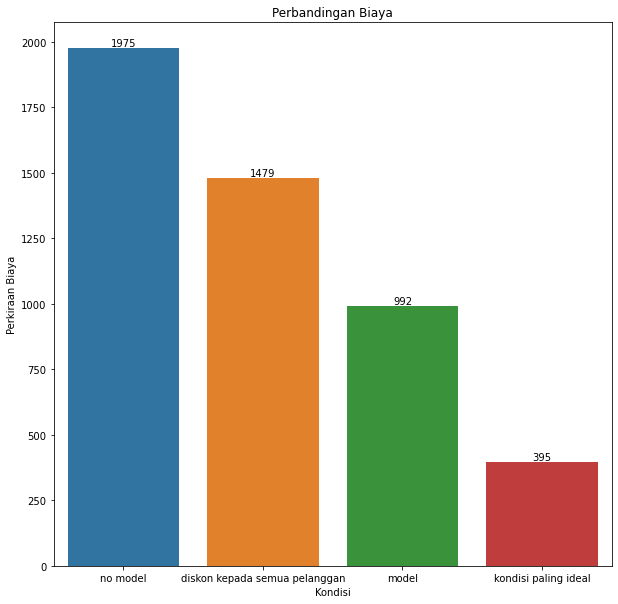

In [91]:
plt.figure(figsize=(10,10))
ax=sns.barplot(biaya.index,biaya['Perkiraan Biaya'])
plt.title('Perbandingan Biaya')
plt.xlabel('Kondisi')
ax.bar_label(ax.containers[0])
plt.show()

* Berdasarkan hasil plotting diatas dapat kita simpulkan bahwa kita dapat menekan biaya pengeluaran perusahaan dengan menggunakan model yang sudah kita buat dengan rincian sebagai berikut:
    1. Menghemat biaya sebesar **50 %** dari skenario kondisi terburuk perusahaan.
    2. Mengehemat biaya sebesar **33 %** dari skenario memberikan voucher diskon kepada setiap pelanggan.

Sehingga dengan menggunakan model yang sudah dibuat, perusahaan dapat menghemat 50 % dari total pengeluarannya.
    

# Kesimpulan & Rekomendasi 

**Kesimpulan** :

1. Dari analisa yang sudah dilakukan model yang memiliki performa paling maksimal yaitu menggunakan model **XGBoost Classifier** dengan dilakukan hyperparameter tuning.
2. Parameter yang paling baik menggunakan parameter : **learning rate : 0.25, max_depth : 3, dan n_estimator: 50.**
3. Nilai Recall dan Precision dari kelas positif yaitu masing-masing sebesar **78% dan 55%**
4. Fitur paling berpengaruh pada model yaitu **Contract, Internet Service Fiber Optic dan Internet Service No**
5. Dengan menggunakan model ini dapat menghemat 50 % total pengeluaran perusahaan dibandingkan dengan perusahan tidak menggunakan model

**Rekomendasi** :
1. Dapat menggunakan algoritma Machine Learning lain seperti CatBoost, LightLgbm.
2. Menambahkan Feature lain seperti Jenis Pembayaran, Paket kecepatan Internet dan lainnya yang berhungan dengan Perusahaan Telco
3. Menggunakan sumber lain dalam perhitungan biaya Customer Acquisition dan mempertahankan pelanggan.
4. Data yang di analisa tidak seimbang (Imbalance) sehingga dapat menggunakan algoritma statistik lain.
5. Berdasarkan analisa Feature Importance, fitur yang paling berpengaruh adalah **Contract, Internet Service Fiber Optic dan Internet Service No** sehingga :

        1. pada kontrak pelanggan dapat memberikan hadiah kepada pelanggan yang mau beralih dari Month-to Month yang sifatnya jangka pendek untuk beralih ke kontrak 1 tahun dan 2 tahun yang bersifat jangka panjang
        2. memberikan harga yang lebih murah terhadap layanan internet fiber optic karena dengan harga yang tinggi juga dapat menjadi pemicu pelanggan tersebut melakukan churn.
        3. memperluas layanan internet perusahaan sehingga dapat menggunakan jasa internet perusahaan.


In [60]:
import pickle

In [61]:
best_model.fit(x,y)

Pipeline(steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Contract',
                                                                           'mapping': {'Month-to-month': 3,
                                                                                       'One year': 2,
                                                                                       'Two year': 1}}...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.25,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, ...))])

In [73]:
pickle.dump(best_model,open('best_model_XGBoost.sav','wb'))

**Terima Kasih**